In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
from PIL import Image 

## Chargement images

In [4]:
train_dir = 'data/Training'
test_dir = 'data/Testing'

In [5]:
filenames_training = [name for name in os.listdir(train_dir)]
filenames_training

['glioma', 'meningioma', 'notumor', 'pituitary']

In [6]:
list_images = [[name for name in os.listdir(train_dir+"/"+cancer_type)] for cancer_type in filenames_training ]

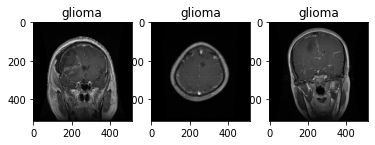

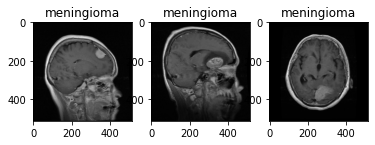

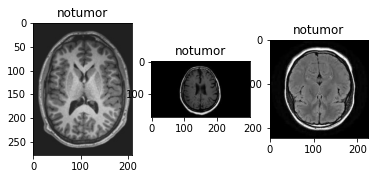

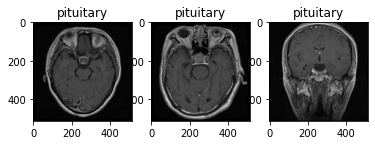

In [7]:
for cancer in filenames_training:
    for i in range(3):
        plt.subplot(1, 3, i + 1)
        randomImageTRAINCOVID = random.choice(os.listdir(train_dir + '/' + cancer))
        plt.imshow(plt.imread(os.path.join( train_dir + '/' + cancer,randomImageTRAINCOVID)), cmap='gray')
        plt.title(cancer)
    plt.show()

## Premiere visualisation

## Premier modele CNN

In [9]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
import seaborn as sns
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

In [17]:
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
img_size = 512

def get_data(data_dir):
    data = [] 
    for label in labels:
        i=0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            if i<500:
                try:
                    img_arr = cv2.imread(os.path.join(path, img))
                    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                    data.append([resized_arr, class_num])
                except Exception as e:
                    print(e)
                i+=1
    return np.array(data)

In [18]:
train = get_data('data/Training')
val = get_data('data/Testing')

C:\Users\marti\AppData\Local\Temp\ipykernel_1512\3453316962.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


C:\Users\marti\anaconda3\envs\covid_cough\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

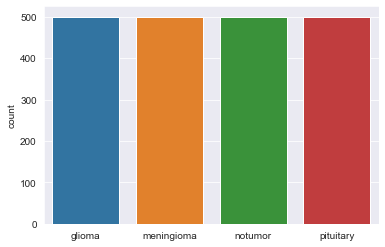

In [19]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("glioma")
    if(i[1] == 1):
        l.append("meningioma")
    if(i[1] == 2):
        l.append("notumor")
    if(i[1] == 3):
        l.append("pituitary")
sns.set_style('darkgrid')
sns.countplot(l)

Text(0.5, 1.0, 'glioma')

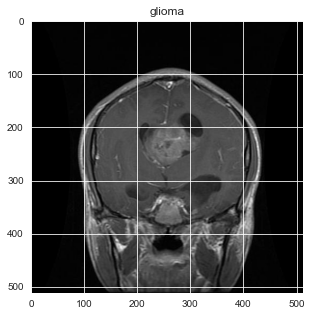

In [20]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'pituitary')

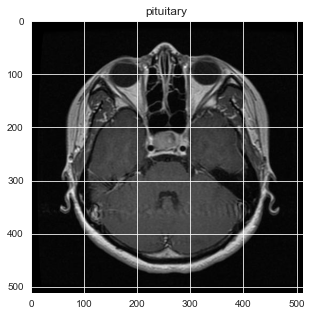

In [21]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [22]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)
    
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [23]:
model = Sequential()
model.add(Conv2D(32,3,padding="same", activation="relu", input_shape=(512,512,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(4, activation="sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 256, 256, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 64)       0

In [24]:
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , loss ='sparse_categorical_crossentropy' , metrics = ['accuracy'])

C:\Users\marti\anaconda3\envs\covid_cough\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
ep = 3
history = model.fit(x_train,y_train,epochs = ep , validation_data = (x_val, y_val))

Epoch 1/3
63/63 [==============================] - 485s 8s/step - loss: 1.3340 - accuracy: 0.2835 - val_loss: 1.3062 - val_accuracy: 0.4035
Epoch 2/3
63/63 [==============================] - 416s 7s/step - loss: 1.2325 - accuracy: 0.5615 - val_loss: 1.2565 - val_accuracy: 0.4729
Epoch 3/3
63/63 [==============================] - 406s 6s/step - loss: 1.1496 - accuracy: 0.6115 - val_loss: 1.2213 - val_accuracy: 0.5004


In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## VGG16

In [ ]:
from imutils import paths
import matplotlib.pyplot as plt
import argparse
import os
import cv2
# Load the images directories
path = "./Desktop/DataFlair/brain_tumor_dataset"
image_paths = list(paths.list_images(path))